In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis


In [6]:


df = pd.read_csv("C:/Users/User/Downloads/house_price.csv")

df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [8]:

df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [10]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

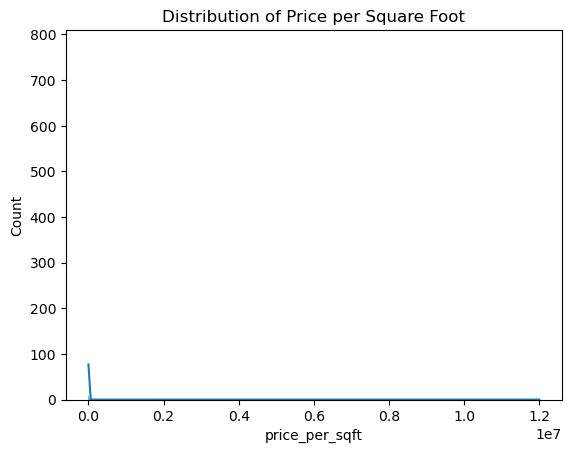

In [12]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Distribution of Price per Square Foot')
plt.show()


In [13]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()


lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev


df_trimmed = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [14]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Filter out outliers
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]


In [15]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [20]:
df['z_score'] = zscore(df['price_per_sqft'])

# Filter out outliers with Z-score > 3 or < -3
df_zscore = df[df['z_score'].abs() <= 3]


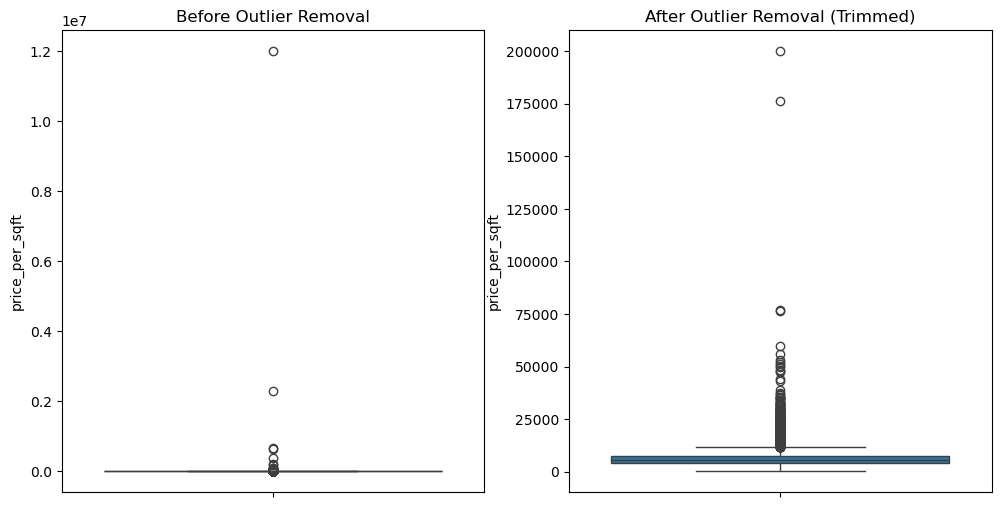

In [22]:
plt.figure(figsize=(12, 6))

# Before removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df['price_per_sqft'])
plt.title('Before Outlier Removal')

# After removal using trimming method (example)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_trimmed['price_per_sqft'])
plt.title('After Outlier Removal (Trimmed)')

plt.show()


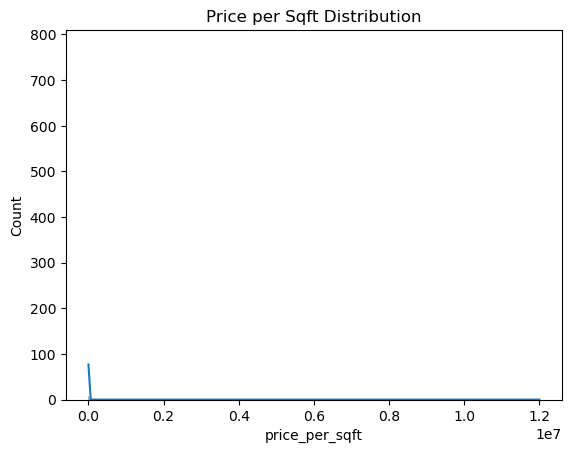

In [24]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Sqft Distribution')
plt.show()


In [25]:
print('Skewness:', skew(df['price_per_sqft']))
print('Kurtosis:', kurtosis(df['price_per_sqft']))


Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


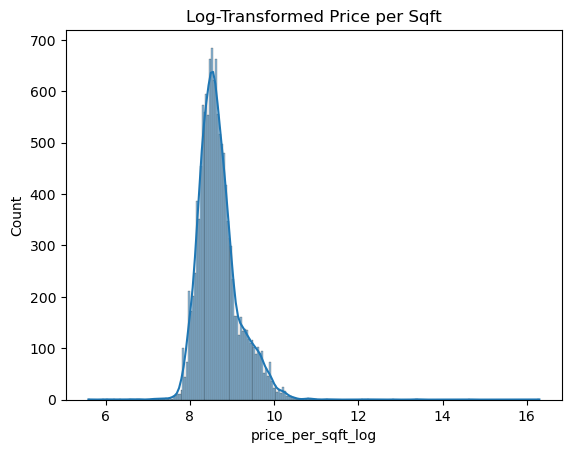

Skewness after log transformation: 1.4003259019533636
Kurtosis after log transformation: 9.203000543610957


In [26]:
df['price_per_sqft_log'] = df['price_per_sqft'].apply(lambda x: np.log(x + 1))

sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Log-Transformed Price per Sqft')
plt.show()

print('Skewness after log transformation:', skew(df['price_per_sqft_log']))
print('Kurtosis after log transformation:', kurtosis(df['price_per_sqft_log']))


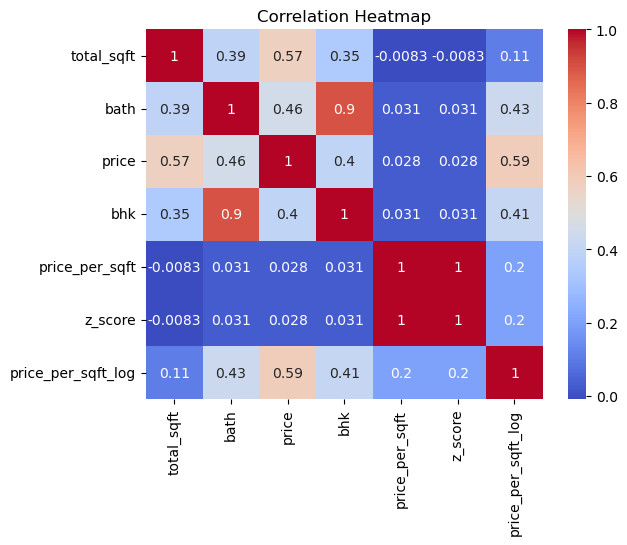

In [30]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [40]:
print(df.columns)


Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft', 'z_score', 'price_per_sqft_log'],
      dtype='object')


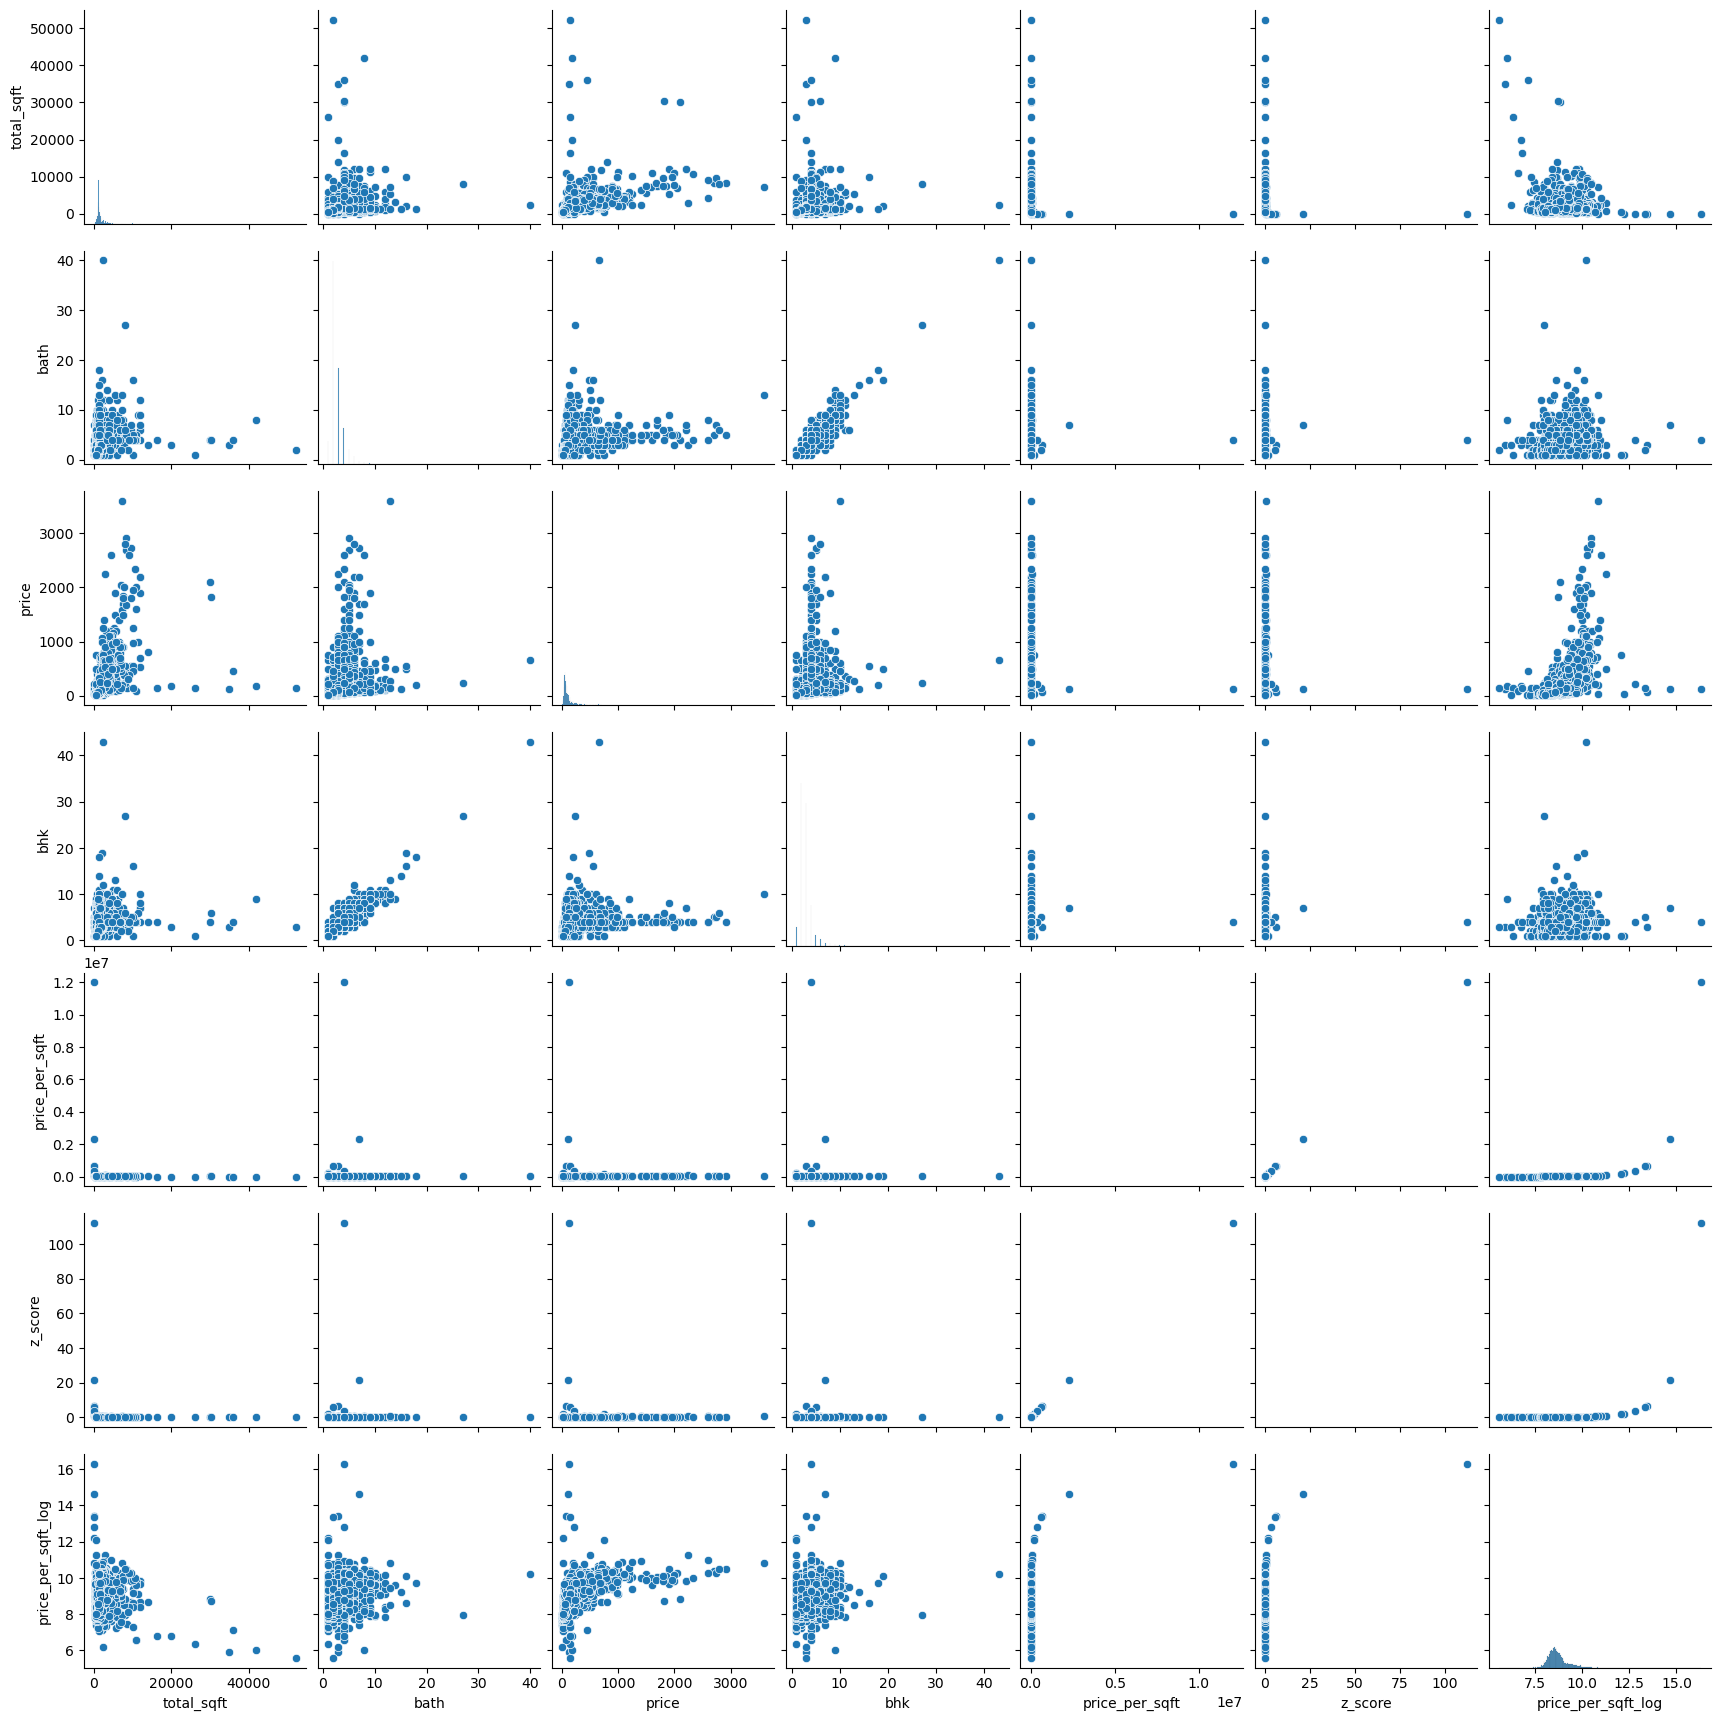

In [50]:
sns.pairplot(df)
plt.show()
